In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from matplotlib import pyplot
from random import randint

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 784)
60000 train samples
10000 test samples


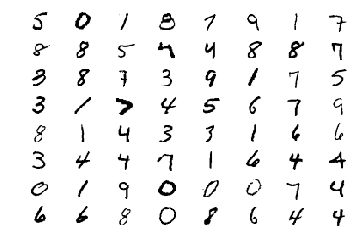

In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

for i in range(64):
    ax = pyplot.subplot(8, 8, i+1)
    ax.axis('off')
    pyplot.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [0]:
def build_model(layers = 2, layer_sizes=[256] * 2, batch_size=128, epochs=20,
                activation_fn='sigmoid', optimiser_fn='sgd',
                add_dropout=False, dropout_p=0.2, l2_reg=0.0):
    model = Sequential()
    # range(a, b) is exclusive of b
    for l in range(0, layers):
        if (l == 0):
            model.add(Dense(layer_sizes[l], kernel_regularizer=l2(l2_reg), activation=activation_fn, input_shape=(image_size,)))
        else:
            model.add(Dense(layer_sizes[l], kernel_regularizer=l2(l2_reg), activation=activation_fn))
        if add_dropout:
            model.add(Dropout(dropout_p))

    model.add(Dense(units=num_classes, activation='softmax'))
    
    model.summary()
    model.compile(optimizer=optimiser_fn, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        verbose=True, validation_split=0.1)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    return history, loss, accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_154 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_155 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 64us/step - loss: 1.8437 - acc: 0.5811 - val_loss: 1.3973 - val_acc: 0.7932
Epoch 2/20
54000/54000 [==============================] - 1s 28us/step - loss: 1.1438 - acc: 0.8045 - val_loss: 0.8526 - val_acc: 0.8640
Epoch 3/20
54000/54000 [==============================] - 1s 28us/step - loss

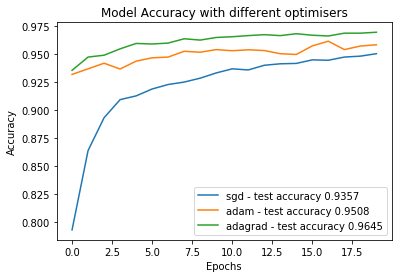

In [0]:
# Test different optimisation functions
legend = []
pyplot.close()
for fn in ['sgd', 'adam', 'adagrad']:
    history, loss, accuracy = build_model(optimiser_fn=fn) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} - test accuracy {}'.format(fn, accuracy))

pyplot.title('Model Accuracy with different optimisers')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_76 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_77 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 46us/step - loss: 1.6343 - acc: 0.6601 - val_loss: 1.0730 - val_acc: 0.8377
Epoch 2/5
54000/54000 [==============================] - 1s 27us/step - loss: 0.8649 - acc: 0.8378 - val_loss: 0.6202 - val_acc: 0.8937
Epoch 3/5
54000/54000 [==============================] - 1s 27us/step - loss: 0

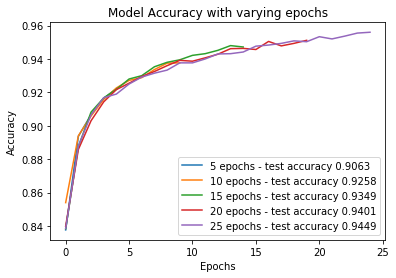

In [0]:
# Test number of epochs
legend = []
pyplot.close()
for epoch_count in range(5, 30, 5):
    history, loss, accuracy = build_model(epochs=epoch_count) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} epochs - test accuracy {}'.format(epoch_count, accuracy))

pyplot.title('Model Accuracy with varying epochs')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_64 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 40us/step - loss: 1.8827 - acc: 0.5731 - val_loss: 1.4454 - val_acc: 0.7808
Epoch 2/20
54000/54000 [==============================] - 1s 26us/step - loss: 1.1803 - acc: 0.7964 - val_loss: 0.8930 - val_acc: 0.8535
Epoch 3/20
54000/54000 [==============================] - 1s 25us/step - loss

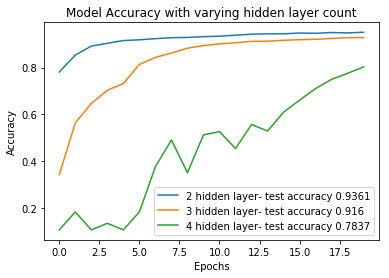

In [0]:
# Test Number of hidden layers
legend.clear()
pyplot.close()
for l in range(2, 5):
    history, loss, accuracy = build_model(l, [256] * l) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} hidden layer- test accuracy {}'.format(l, accuracy))

pyplot.title('Model Accuracy with varying hidden layer count')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_106 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_107 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 52us/step - loss: 2.1607 - acc: 0.3484 - val_loss: 2.0041 - val_acc: 0.5142
Epoch 2/20
54000/54000 [==============================] - 1s 25us/step - loss: 1.9083 - acc: 0.5418 - val_loss: 1.7843 - val_acc: 0.5928
Epoch 3/20
54000/54000 [==============================] - 1s 25us/step - loss: 

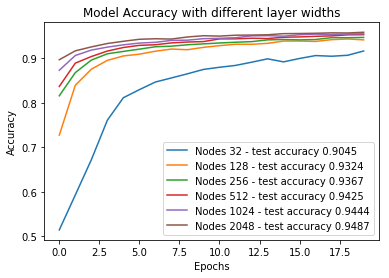

In [0]:
# Test different layer widths
legend.clear()
pyplot.close()
for nodes in [32, 128, 256, 512, 1024, 2048]:
    history, loss, accuracy = build_model(2, [nodes] * 2) 
    pyplot.plot(history.history['val_acc'])
    legend.append('Nodes {} - test accuracy {}'.format(nodes, accuracy))
    print('Nodes {} - test accuracy {}'.format(nodes, accuracy))

    pyplot.title('Model Accuracy with different layer widths')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_223 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_224 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 94us/step - loss: 1.8486 - acc: 0.5970 - val_loss: 1.3977 - val_acc: 0.7897
Epoch 2/20
54000/54000 [==============================] - 2s 29us/step - loss: 1.1475 - acc: 0.8043 - val_loss: 0.8672 - val_acc: 0.8715
Epoch 3/20
54000/54000 [==============================] - 2s 29us/step - loss

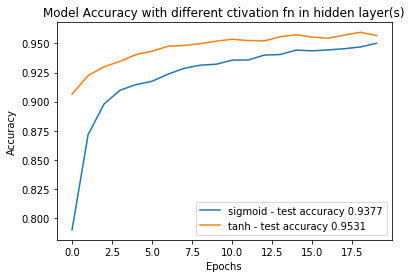

In [0]:
# Test different activation fn in hidden layer(s)
legend.clear()
pyplot.close()
for fn in ['sigmoid', 'tanh']:
    history, loss, accuracy = build_model(activation_fn=fn) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} - test accuracy {}'.format(fn, accuracy))

pyplot.title('Model Accuracy with different ctivation fn in hidden layer(s)')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_49 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_50 (Dense)             (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 48us/step - loss: 2.30

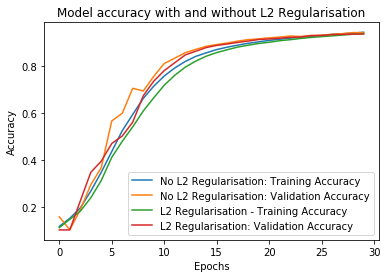

In [0]:
# L2 Regularisation Accuracy
legend = []
pyplot.close()

history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=30) 
pyplot.plot(history.history['acc'])
legend.append('No L2 Regularisation: Training Accuracy')
pyplot.plot(history.history['val_acc'])
legend.append('No L2 Regularisation: Validation Accuracy')
print('Test Accuracy - {}'.format(accuracy))

history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=30,l2_reg=0.001) 
pyplot.plot(history.history['acc'])
legend.append('L2 Regularisation - Training Accuracy')
pyplot.plot(history.history['val_acc'])
legend.append('L2 Regularisation: Validation Accuracy')
print('Test Accuracy - {}'.format(accuracy))

pyplot.title('Model accuracy with and without L2 Regularisation')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_57 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_59 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_60 (Dense)             (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 49us/step - loss: 2.30

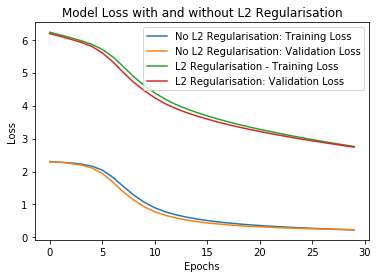

In [0]:
# L2 Regularisation Loss
legend = []
pyplot.close()

history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=30) 
pyplot.plot(history.history['loss'])
legend.append('No L2 Regularisation: Training Loss')
pyplot.plot(history.history['val_loss'])
legend.append('No L2 Regularisation: Validation Loss')


history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=30,l2_reg=0.001) 
pyplot.plot(history.history['loss'])
legend.append('L2 Regularisation - Training Loss')
pyplot.plot(history.history['val_loss'])
legend.append('L2 Regularisation: Validation Loss')

pyplot.title('Model Loss with and without L2 Regularisation')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_213 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_214 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_215 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_216 (Dense)            (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/35
54000/54000 [==============================] - 5s 96us/step - loss: 2.30

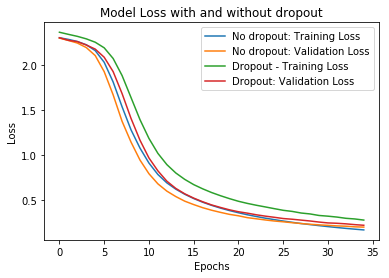

In [0]:
# Dropout Loss
legend.clear()
pyplot.close()

history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=35) 
pyplot.plot(history.history['loss'])
legend.append('No dropout: Training Loss')
pyplot.plot(history.history['val_loss'])
legend.append('No dropout: Validation Loss')


history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=35, add_dropout=True, dropout_p=0.2) 
pyplot.plot(history.history['loss'])
legend.append('Dropout - Training Loss')
pyplot.plot(history.history['val_loss'])
legend.append('Dropout: Validation Loss')

pyplot.title('Model Loss with and without dropout')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_202 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_203 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_204 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_205 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_206 (Dense)            (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/35
54000/54000 [==============================] - 5s 99us/step - loss: 2.29

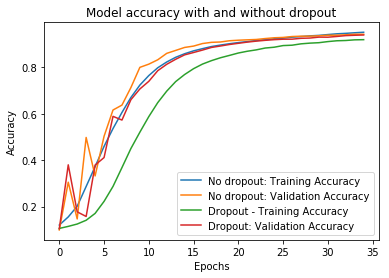

In [0]:
# Dropout Accuracy
legend.clear()
pyplot.close()

history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=35) 
pyplot.plot(history.history['acc'])
legend.append('No dropout: Training Accuracy')
pyplot.plot(history.history['val_acc'])
legend.append('No dropout: Validation Accuracy')


history, loss, accuracy = build_model(layers=4, layer_sizes=[1024] * 4, epochs=35, add_dropout=True, dropout_p=0.2) 
pyplot.plot(history.history['acc'])
legend.append('Dropout - Training Accuracy')
pyplot.plot(history.history['val_acc'])
legend.append('Dropout: Validation Accuracy')

pyplot.title('Model accuracy with and without dropout')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()